In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print("Done")

Done


In [2]:
from main_classes.voltage_maps import VoltageMapCollection
from main_classes.epsilon_cover import BasicCoverTree, run_cover_properties_test, estimate_span
from utilities.generate_toy_data import generate_2D_plane
print("DONE")

DONE


### Load data

In [3]:
data = generate_2D_plane(datasize=2000)
print(data.shape)

(2000, 2)


In [4]:
epsilon = 0.2
start_lvl = 2
max_lvl = 6

### Build epsilon covers

In [5]:
init_radius = estimate_span(data)
epsilon_cover_factory = BasicCoverTree(init_radius)
for x in data:
    epsilon_cover_factory.insert(x)
print("DONE")

DONE


##### Estimate densities

In [21]:
data = generate_2D_plane(datasize=50000)
epsilon_cover_factory.estimate_densities(data)
densities = epsilon_cover_factory.get_densities()
print("DONE")

DONE


Plot level 1
Number of centers lvl 1 = 2
Plot level 2
Number of centers lvl 2 = 10
Plot level 3
Number of centers lvl 3 = 45
Plot level 4
Number of centers lvl 4 = 179


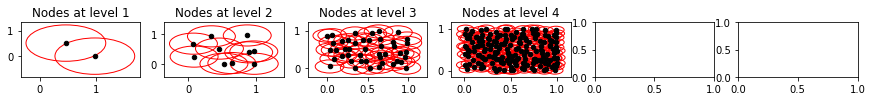

In [22]:
%matplotlib inline
epsilon_reduce_factor = 2
indices = [0, 1]
centers_dict = epsilon_cover_factory.get_centers()


fig, axes = plt.subplots(1, max_lvl, figsize=(15, 1))
for i, lvl in enumerate(range(1, 5)):
    centers = centers_dict[lvl]
    print(f'Plot level {lvl}')
    print(f'Number of centers lvl {lvl} = {len(centers)}')
    radius = init_radius / (epsilon_reduce_factor ** lvl)
    for center in centers:
        axes[i].set_title(f'Nodes at level {lvl}')
        axes[i].add_patch(plt.Circle(tuple([center[indices[0]], center[indices[1]]]),
                                    radius=radius, color='r', fill=False))
        axes[i].scatter(center[indices[0]], center[indices[1]], s=20, c='k', marker='o', zorder=2)
plt.show()

### Construct voltage map collection and propagate voltages

In [23]:
voltage_map_collections = {}
source_indices = {}
epsilon_cover = epsilon_cover_factory.get_epsilon_cover(max_lvl = max_lvl+1)

source_centers_start_level = epsilon_cover[start_lvl]['centers']
for lvl in range(start_lvl, max_lvl):
    indices = []
    for source_center in source_centers_start_level:
        indices.append(np.where(np.all(epsilon_cover[lvl]['centers'] == source_center, axis=1))[0])
    source_indices[lvl] = np.array(indices).flatten()
print("DONE")

DONE


In [24]:
source_indices

{2: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 3: array([ 0,  2,  4,  5,  7, 20, 24, 39, 41, 43], dtype=int64),
 4: array([  0,   2,   4,   5,   7,  33,  41, 164, 168, 171], dtype=int64),
 5: array([  0,   2,   4,   5,   7,  46,  59, 509, 516, 520], dtype=int64)}

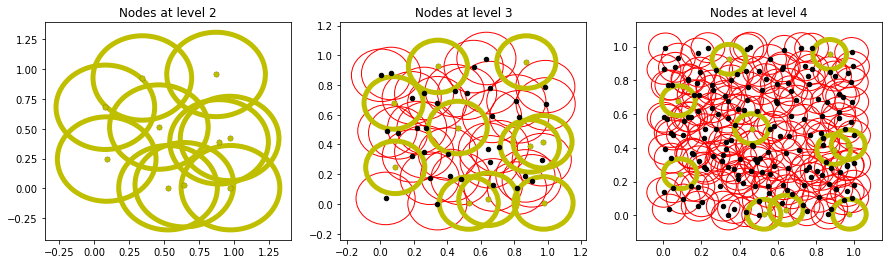

In [25]:
%matplotlib inline
epsilon_reduce_factor = 2
indices = [0, 1]
centers_dict = epsilon_cover_factory.get_centers()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, lvl in enumerate(range(2, 5)):
    centers = np.array(centers_dict[lvl])
    sources = centers[source_indices[lvl]]

    radius = init_radius / (epsilon_reduce_factor ** lvl)
    for center in centers:
        axes[i].set_title(f'Nodes at level {lvl}')
        axes[i].add_patch(plt.Circle(tuple([center[indices[0]], center[indices[1]]]),
                                    radius=radius, color='r', fill=False))
        axes[i].scatter(center[indices[0]], center[indices[1]], s=20, c='k', marker='o', zorder=2)
    for source in sources:
        axes[i].add_patch(plt.Circle(tuple([source[indices[0]], source[indices[1]]]),
                                    radius=radius, color='y', fill=False, linewidth=5))
        axes[i].scatter(source[indices[0]], source[indices[1]], s=20, c='y', marker='o', zorder=2)
plt.show()

In [26]:
for lvl in range(start_lvl, max_lvl):
    voltage_map_collections[lvl] = VoltageMapCollection(epsilon_cover[lvl], source_indices[lvl])
    voltage_map_collections[lvl].propagate_voltage_maps()
print("DONE")

propagating labels:   5%|███                                                       | 52/1000 [00:00<00:00, 5200.62it/s]

DONE


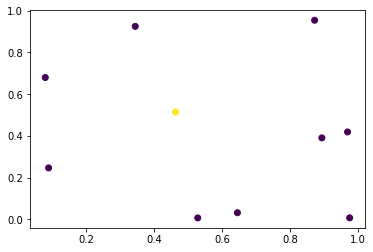

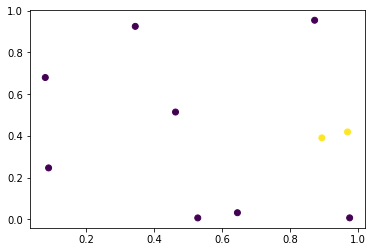

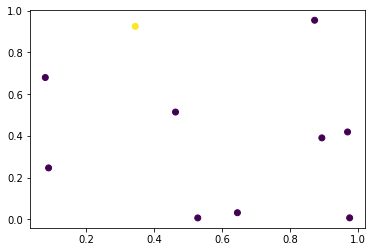

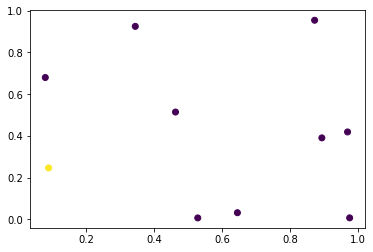

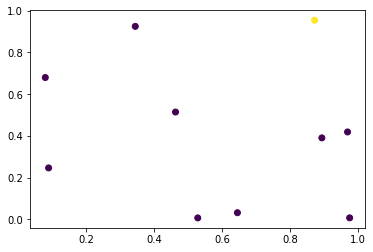

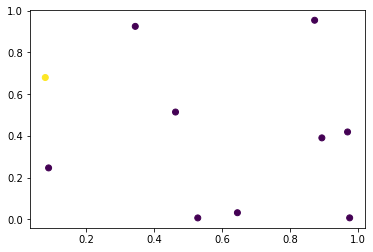

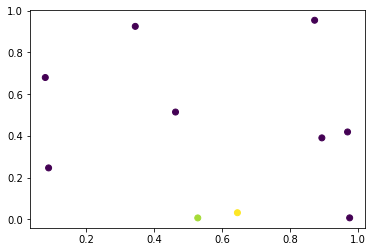

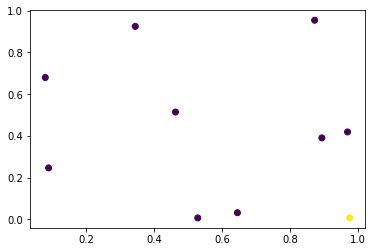

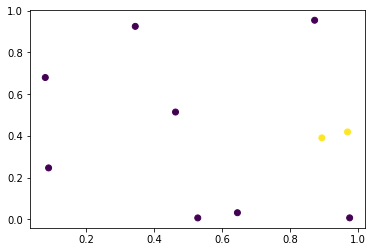

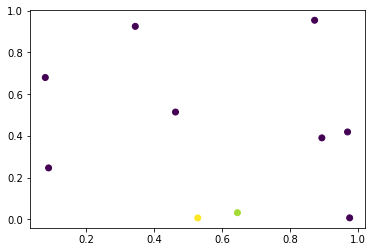

In [27]:
lvl = start_lvl
voltage_map_collection = voltage_map_collections[lvl].get_voltage_map_collection()

for voltage_map in voltage_map_collection:
    plt.figure()
    plt.scatter(epsilon_cover[lvl]['centers'][:, 0], epsilon_cover[lvl]['centers'][:, 1], c=voltage_map.get_voltage())

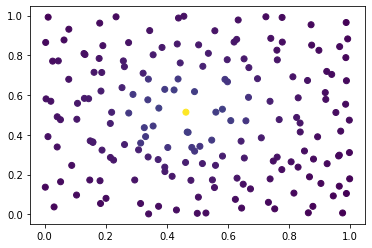

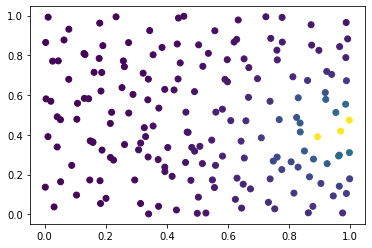

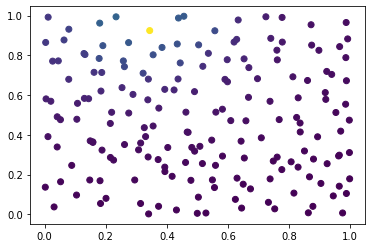

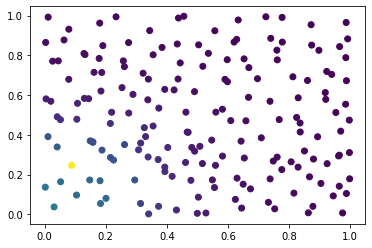

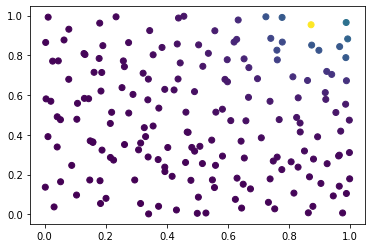

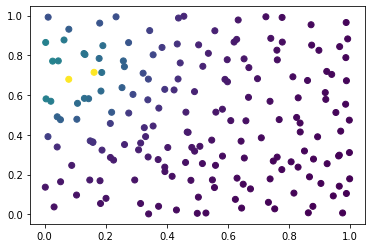

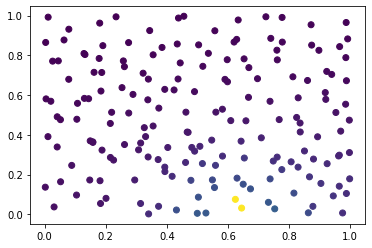

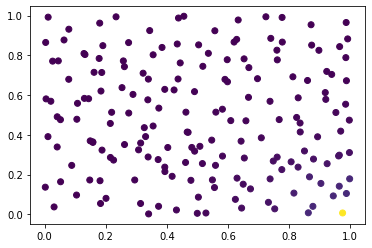

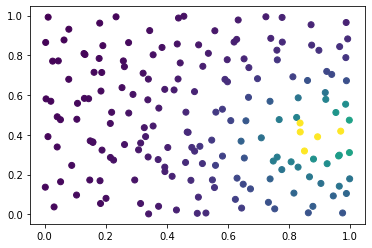

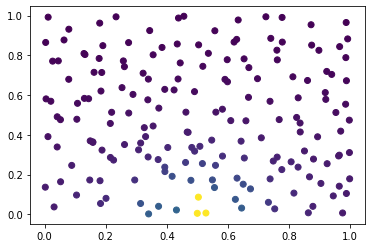

In [28]:
lvl = start_lvl + 2
voltage_map_collection = voltage_map_collections[lvl].get_voltage_map_collection()

for voltage_map in voltage_map_collection:
    plt.figure()
    plt.scatter(epsilon_cover[lvl]['centers'][:, 0], epsilon_cover[lvl]['centers'][:, 1], c=voltage_map.get_voltage())

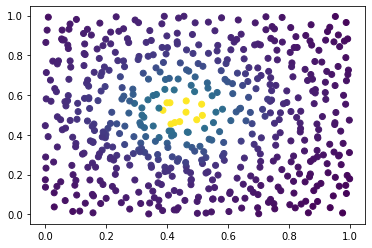

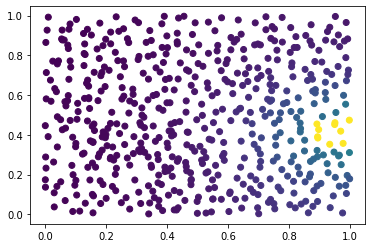

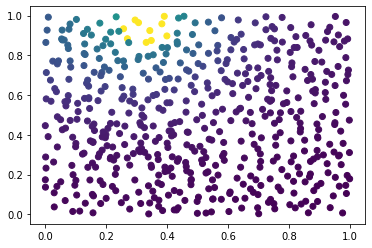

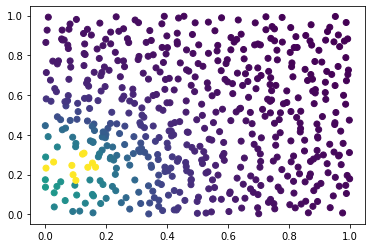

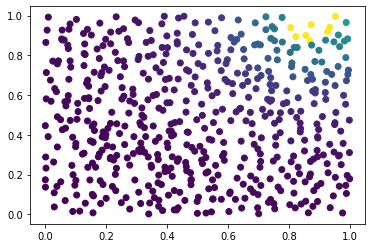

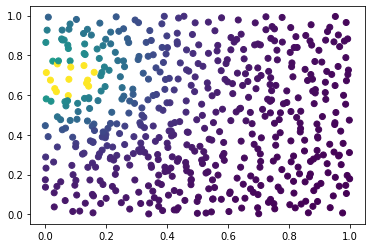

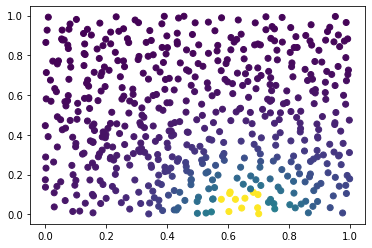

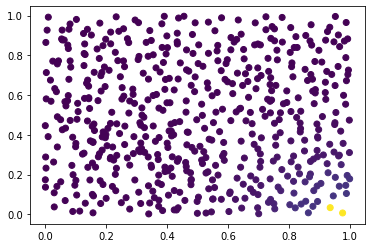

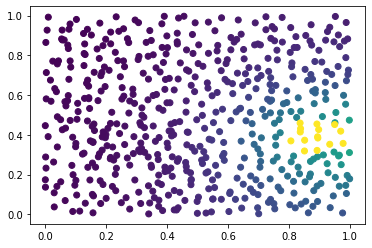

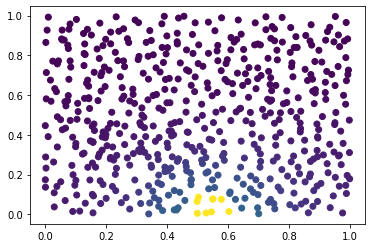

In [29]:
lvl = start_lvl + 3
voltage_map_collection = voltage_map_collections[lvl].get_voltage_map_collection()

for voltage_map in voltage_map_collection:
    plt.figure()
    plt.scatter(epsilon_cover[lvl]['centers'][:, 0], epsilon_cover[lvl]['centers'][:, 1], c=voltage_map.get_voltage())